<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BD%D0%B0_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D0%B5_Pandas_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2_%D1%80%D0%B0%D0%B7%D0%B1%D0%BE%D1%80_%D0%B4_%D0%B7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

#Работа с таблицами данных на примере Pandas. Часть 2 - разбор д.з.

#Домашнее задание

## Уровень базовый


### Задание 1

1. Загрузите в DataFrame данные по количеству выборщиков в США по штатам за 1788 - 2020 год:
http://dataudt.ru/datasets/Electoral_College.csv
2. Выведите размерность DataFrame
3. Выведите инфомрацию о колонках(виды колонок, количество непустых значений, тип данных)

In [ ]:
import pandas as pd # импортируем библиотеку Pandas

In [ ]:
!wget http://dataudt.ru/datasets/Electoral_College.csv

--2021-04-15 22:31:51--  http://dataudt.ru/datasets/Electoral_College.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52503 (51K) [application/octet-stream]
Saving to: ‘Electoral_College.csv.1’

Electoral_College.c 100%[===================>]  51.27K  --.-KB/s    in 0.09s   

2021-04-15 22:31:51 (571 KB/s) - ‘Electoral_College.csv.1’ saved [52503/52503]



In [ ]:
votes = pd.read_csv('/content/Electoral_College.csv') # считываем данные из файла
votes.head(10) # выводим первые 10 строк

,Year,State,Votes
0,1788,Alabama,NaN
1,1792,Alabama,NaN
2,1796,Alabama,NaN
3,1800,Alabama,NaN
4,1804,Alabama,NaN
5,1808,Alabama,NaN
6,1812,Alabama,NaN
7,1816,Alabama,NaN
8,1820,Alabama,3.0
9,1824,Alabama,5.0


In [ ]:
votes.shape # смотрим размерности полученного DataFrame

(3009, 3)

In [ ]:
votes.info() # выводим сводную информацию о колонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    3009 non-null   int64  
 1   State   3009 non-null   object 
 2   Votes   2306 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 70.6+ KB


### Задание 2

Удалите строки, содержащие пропуски в колонке Votes.

Посмотрите на  результат с помощью head()

In [ ]:
votes = votes.dropna(axis=0, how='any') # удаляем строки, содержащие пропуски
votes.head() # проверяем результат, выводим первые пять строк

,Year,State,Votes
8,1820,Alabama,3.0
9,1824,Alabama,5.0
10,1828,Alabama,5.0
11,1832,Alabama,7.0
12,1836,Alabama,7.0


### Задание 3

Соберите информацию:
1. Узнайте количество уникальных штатов, из которых избираются выборщики.
2. Выведите эти штаты (в виде list или nd.array)
3. Выведите информацию, сколько раз проходили выборы (количество уникальных записей в Year)
4. Найдите год первых и последних выборов, о которых у нас есть записи.

In [ ]:
votes["State"].nunique() # выведем количество уникальных записей в колонке State

51

In [ ]:
votes["State"].unique() # выведем уникальные записи в колонке State

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'D.C.', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
votes["Year"].nunique() # выведем количество уникальных записей в колонке Year

59

In [ ]:
votes["Year"].min() # найдем минимальный год

1788

In [ ]:
votes["Year"].max() # найдем максимальный год

2020

### Задание 4

1. Сформируйте отчет, отражающий количество выборщиков на каждых выборах.
    Подсказка - используйте groupby.sum()
2. Сформируйте отчет, отражающий количество штатов на каждых выборах.
3. Сформируйте таблицу, отражающую количество штатов и выборщиков на каждых выборах

In [ ]:
votes_by_year_sum = votes.groupby('Year')[['Votes']].sum() # делаем группировку по годам и считаем сумму по голосам
votes_by_year_sum.head() # смотрим на результат

,Votes
Year,
1788,81.0
1792,135.0
1796,138.0
1800,138.0
1804,176.0


In [ ]:
votes_by_year_count = votes.groupby('Year')[['Votes']].count() # делаем группировку по годам и считаем сколько шатов голосовало
votes_by_year_count.head() # смотрим на результат

,Votes
Year,
1788,11
1792,15
1796,16
1800,16
1804,17


In [ ]:
votes_by_year = votes.groupby('Year')[['Votes']].agg(['count', 'sum']) # делаем группировку по годам, и выводим статистики по сумме и количеству
votes_by_year.head() # смотрим на результат

Votes       
     count    sum
Year             
1788    11   81.0
1792    15  135.0
1796    16  138.0
1800    16  138.0
1804    17  176.0

### Задание 5

Найдите, в каком году в выборах впервые участвовали выборщики из Аляски (Alaska)

In [ ]:
mask = votes['State'] ==  'Alaska' # создаем маску для выбора "штат = Аляска"
votes[mask].head() # применяем маску и смотрим как выгялит результат

,Year,State,Votes
102,1960,Alaska,3.0
103,1964,Alaska,3.0
104,1968,Alaska,3.0
105,1972,Alaska,3.0
106,1976,Alaska,3.0


In [ ]:
votes[mask]['Year'].min() # найдем минимальное значение для года

1960

## Уровень основной

### Задание 1

1. Прочитайте DataFrame c результатами всех футбольных матчей с 1872 по 2021 год:
http://dataudt.ru/datasets/results.csv
2. Выведите 5 первых и 3 последних строки DataFrame.
3. Выведите размерности DataFrame
4. Выведите информацию о количестве, типе колонок и количестве не пустых значений. Сделайте выводы,есть ли в нашем DataFrame пропуски.



In [ ]:
import pandas as pd # импортируем библиотеку

In [ ]:
!wget http://dataudt.ru/datasets/results.csv

--2021-04-15 22:31:51--  http://dataudt.ru/datasets/results.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3141528 (3.0M) [application/octet-stream]
Saving to: ‘results.csv’

results.csv         100%[===================>]   3.00M  9.73MB/s    in 0.3s    

2021-04-15 22:31:52 (9.73 MB/s) - ‘results.csv’ saved [3141528/3141528]



In [ ]:
results = pd.read_csv('/content/results.csv') # считываем DataFrame из файла

In [ ]:
results.head() # смотрим первые пять строк

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
results.tail(3) # смотрим последние три строки

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
42081,2021-03-31,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False
42082,2021-03-31,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False
42083,2021-03-31,Liechtenstein,Iceland,1,4,FIFA World Cup qualification,Vaduz,Liechtenstein,False


In [ ]:
results.shape # выводим размерности 

(42084, 9)

In [ ]:
results.info() # выводим сводную информацию о колонках нашего DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42084 entries, 0 to 42083
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        42084 non-null  object
 1   home_team   42084 non-null  object
 2   away_team   42084 non-null  object
 3   home_score  42084 non-null  int64 
 4   away_score  42084 non-null  int64 
 5   tournament  42084 non-null  object
 6   city        42084 non-null  object
 7   country     42084 non-null  object
 8   neutral     42084 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


**Пропусков нет,т.к. всего 42084 строки и во всех колонках 42084 не пустых значения.**

### Задание 2

1. Создайте datetime index из колонки date и запишите его в index нашего DataFrame
2. Удалите колонку date
3. Покажите результат (5 первых строк)




In [ ]:
results.index = pd.to_datetime(results['date']) # меняем наш индекс на datetime
results.drop('date', axis=1, inplace = True) # удаляем колонку date

In [ ]:
results.head() # для проверки смотрим на результат (первые пять строк)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1873-03-08,England,Scotland,4,2,Friendly,London,England,False
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1875-03-06,England,Scotland,2,2,Friendly,London,England,False
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


### Задание 3

Создайте колонку delta как модуль разности между количеством голов в матче (home_score - away_score).

Найдите какая максимальное значение в колонке delta

In [ ]:
results['delta'] = (results['home_score'] - results['away_score']).abs() # вычисляем колонку delta как модуль разности

In [ ]:
results['delta'].max() # находим максимальное значение

31

### Задание 4

Найдите общее количество матчей, где команда Scotland принимала в гостях команду England.





In [ ]:
mask = (results['home_team'] == 'Scotland') & (results['away_team'] == 'England') # создаем маску из условий "домашняя команда "Шотландия", "гостевая команда "Англия"

In [ ]:
results[mask].head() # проверяем себя - смотрим на результат применения маски, первые пять строк

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,delta
date,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3
1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,5
1880-03-13,Scotland,England,5,4,Friendly,Glasgow,Scotland,False,1


In [ ]:
results[mask].shape[0] # выводим количество строк в нашей таблице, это и будет количество матчей

58

In [ ]:
mask.sum() # альтернативный способ расчитать количество матчей

58

### Задание 5

Найдите общее количество голов, которые были забиты с 1875 по 1882 год включительно.

In [ ]:
results['1875' : '1882'] # делаем срез по Datetime index, убеждаемся что все корректно

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,delta
date,,,,,,,,,
1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3
1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,4
1877-03-03,England,Scotland,1,3,Friendly,London,England,False,2
1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,2
1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,5
1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,9
1879-01-18,England,Wales,2,1,Friendly,London,England,False,1
1879-04-05,England,Scotland,5,4,Friendly,London,England,False,1


In [ ]:
home_score = results['1875' : '1882']['home_score'].sum() # находим сумму по колонке home_score
away_score = results['1875' : '1882']['away_score'].sum() # находим сумму по колонке away_score

In [ ]:
print (f'всего было забито {home_score + away_score} гола') # выводим результат

всего было забито 124 гола


## Уровень Продвинутый

### Задание 1

1. Загрузите информацию о запуске космических кораблей из файла Space_Corrected.csv
http://dataudt.ru/datasets/Space_Corrected.csv
2. Выведите первые пять строк полученного DataFrame
3. Вывведите информацию о колонках, их типах, и количестве непустых значений.
4. Выведите размерности полученного DataFrame
5. Выведите наименования колонок, которые имеются в DataFrame


In [ ]:
!wget http://dataudt.ru/datasets/Space_Corrected.csv

--2021-04-15 22:31:53--  http://dataudt.ru/datasets/Space_Corrected.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632978 (618K) [application/octet-stream]
Saving to: ‘Space_Corrected.csv’

Space_Corrected.csv 100%[===================>] 618.14K  2.76MB/s    in 0.2s    

2021-04-15 22:31:53 (2.76 MB/s) - ‘Space_Corrected.csv’ saved [632978/632978]



In [ ]:
space_missions = pd.read_csv('/content/Space_Corrected.csv') # прочитаем данные из файла
space_missions.head() # выведем "заголовок" - первые пять строк

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
space_missions.info() # выведем информацию по колонкам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
space_missions.shape # выведем данные по размерностям

(4324, 9)

In [ ]:
space_missions.columns # посмотрим, какие есть колонки

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

### Задание 2

1. Удалите две первых колонки - они не несут необходимой информации.
2. Создайте колонку "Rocket_is_NA", которая должа содержать 1, если в колонке " Rocket"  хранится NaN или 0, если в колонке " Rocket" хранится значение.
3. Заполните пропуски в колонке " Rocket" значением 0

In [ ]:
space_missions.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 'columns', inplace=True) # удалим ненужные колонки
space_missions.head() # проверим результат

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
space_missions['Rocket_is_NA'] = space_missions[' Rocket'].isna().astype(int) # создадим новую колонку Rocket_is_NA
space_missions[' Rocket'].fillna(0, inplace=True) # заполним пропуски в колонке Rocket значением 0

In [ ]:
space_missions.head() # проверим результат

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Rocket_is_NA
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,0
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,0


### Задание 3

1. Создайте Datetime Index из колонки Datum
2. Удалите колонку Datum
3. Выведите первые 10 строк полученного DataFrame


In [ ]:
dt_index = pd.to_datetime(space_missions['Datum'], utc=True) # создадим DateTime index 
space_missions.index = dt_index # заменим текущий индекс на созданный DateTime index
space_missions.drop('Datum', axis='columns', inplace=True) # удалим колонку Datum
space_missions.head(10) # посмотрим на результат

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Rocket_is_NA
Datum,,,,,,,
2020-08-07 05:12:00+00:00,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,0
2020-08-06 04:01:00+00:00,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,0
2020-08-04 23:57:00+00:00,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,1
2020-07-30 21:25:00+00:00,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,0
2020-07-30 11:50:00+00:00,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,0
2020-07-25 03:13:00+00:00,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,0
2020-07-23 14:26:00+00:00,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,0
2020-07-23 04:41:00+00:00,CASC,"LC-101, Wenchang Satellite Launch Center, China",Long March 5 | Tianwen-1,StatusActive,0,Success,1
2020-07-20 21:30:00+00:00,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,0


### Задание 4

1. Сделайте resample по календарным годам с подсчетом количества полетов в каждом календарном году.
2. Выведите график, показывающий изменение количества полетов от года к году. Подсказка - попробуйте применить метод .plot()

In [ ]:
missions_by_year = space_missions[['Company Name']].resample('A').count() # сделаем resample по календарному году с подсчетом количества строк
missions_by_year.head() # посмотрим на результат

,Company Name
Datum,
1957-12-31 00:00:00+00:00,3
1958-12-31 00:00:00+00:00,28
1959-12-31 00:00:00+00:00,20
1960-12-31 00:00:00+00:00,39
1961-12-31 00:00:00+00:00,52


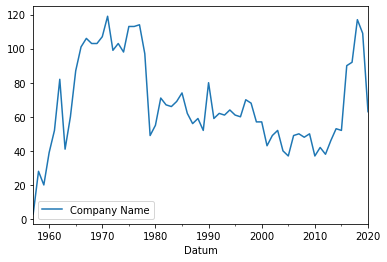

In [ ]:
missions_by_year.plot() # построим график количества полетов по годам

### Задание 5

Для компании Роскосмос (Roscosmos) найдите:
1. Общее количество полетов
2. Список всех космодромов, с которых осуществлялся запуск
3. Дату самого раннего и самого позднего старта
4. Выведите информацию о количестве удачных/неудачных и частично-неудачных запусках (колонка Status Mission)

In [ ]:
mask_ROSKOSMOS = space_missions['Company Name']=='Roscosmos' # создадим маску, является ли компания Roscosmos

In [ ]:
space_missions[mask_ROSKOSMOS].shape # посмотрим на размерность выборки 

(55, 7)

In [ ]:
print(f'общее количество полетов {space_missions[mask_ROSKOSMOS].shape[0]}') # выведем общее количество полетов

общее количество полетов 55


In [ ]:
space_missions[mask_ROSKOSMOS]['Location'].unique() # выведем уникальные записи в поле Location - космодромы

array(['Site 200/39, Baikonur Cosmodrome, Kazakhstan',
       'Site 31/6, Baikonur Cosmodrome, Kazakhstan',
       'Site 81/24, Baikonur Cosmodrome, Kazakhstan',
       'Site 1/5, Baikonur Cosmodrome, Kazakhstan',
       'Site 1S, Vostochny Cosmodrome, Russia',
       'Site 43/4, Plesetsk Cosmodrome, Russia',
       'Site 45/1, Baikonur Cosmodrome, Kazakhstan'], dtype=object)

In [ ]:
space_missions[mask_ROSKOSMOS].index.min() # найдем дату первого запуска у компании Roscosmos

Timestamp('1970-06-01 19:00:00+0000', tz='UTC')

In [ ]:
space_missions[mask_ROSKOSMOS].index.max() # найдем дату самого позднего запуска, которая имеется в нашей базе

Timestamp('2020-07-30 21:25:00+0000', tz='UTC')

In [ ]:
space_missions[mask_ROSKOSMOS].groupby('Status Mission')['Company Name'].aggregate('count') # выведем информацию о количестве удачных/неудачных запусков

Status Mission
Failure             3
Partial Failure     1
Success            51
Name: Company Name, dtype: int64

## Уровень Профессиональный

### Задание 1

1. Создайте 3 DataFrame sales, stores, features, загрузив из соответствующих файлов CSV:

http://dataudt.ru/datasets/sales data-set.csv

http://dataudt.ru/datasets/stores data-set.csv

http://dataudt.ru/datasets/Features data set.csv

(Подсказка: адреса читаются не полностью, если в имени файла - пробел, поэтому рекомендуем заключить адрес после !wget в кавычки) 
2. Для каждого DataFrame посмотрите хранящеся там данные (несколько строк), а также выведите размерности таблиц.
3. Попробуйте разобраться в том, какая информация хранится в этих таблицах, как эти данные могут быть связаны между собой. 


In [ ]:
!wget 'http://dataudt.ru/datasets/sales data-set.csv'
!wget 'http://dataudt.ru/datasets/stores data-set.csv'
!wget 'http://dataudt.ru/datasets/Features data set.csv'

--2021-04-15 22:31:54--  http://dataudt.ru/datasets/sales%20data-set.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13264115 (13M) [application/octet-stream]
Saving to: ‘sales data-set.csv’

sales data-set.csv  100%[===================>]  12.65M  23.2MB/s    in 0.5s    

2021-04-15 22:31:55 (23.2 MB/s) - ‘sales data-set.csv’ saved [13264115/13264115]

--2021-04-15 22:31:55--  http://dataudt.ru/datasets/stores%20data-set.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577 [application/octet-stream]
Saving to: ‘stores data-set.csv’

stores data-set.csv 100%[===================>]     577  --.-KB/s    in 0s      

2021-04-15 22:31:55 (104 MB/s) - ‘stores data-set.csv’ saved [577/577]

--2021-04-15 22:31:55--  http://dataudt.r

In [ ]:
# прочитаем данные из файлов в соответствующие DataFrame
sales = pd.read_csv("/content/sales data-set.csv")
stores = pd.read_csv('/content/stores data-set.csv')
features = pd.read_csv('/content/Features data set.csv')

In [ ]:
sales.head() # выведем первые строки таблицы Продажи

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
sales.shape # выведем размерность таблицы Продажи

(421570, 5)

In [ ]:
stores.head() # выведем первые строки таблицы Магазины

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.shape # вывведем размерность таблицы Магазины

(45, 3)

In [ ]:
features.head() # выведем первые строки таблицы Признаки

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.shape  # вывведем размерность таблицы Признаки

(8190, 12)

### Задание 2

Попробуем сделать небольшой анализ данных. хранящихся в наших таблицах. Для этого выведите:
1. Описательные статистики для значения еженедельных продаж
2. Минимальную и максимальную даты, за которые у нас имеется информация по продажам.
3. Какие категории (типы) есть у магазинов
4. Выведите описательные статистики для числовых колонок таблицы features


In [ ]:
sales[['Weekly_Sales']].describe() # выведем описательные статистики для колонки "еженедельные продажи"

,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


In [ ]:
sales['Date_DT'] = pd.to_datetime(sales['Date']) # создадим новую колонку и сохраним в неё Datetime от колонки Date

In [ ]:
sales['Date_DT'].min() # найдем минимальное значение

Timestamp('2010-01-10 00:00:00')

In [ ]:
sales['Date_DT'].max() # найдем максимальное значение

Timestamp('2012-12-10 00:00:00')

In [ ]:
stores['Type'].unique() # найдем уникальные типы в классификации магазинов

array(['A', 'B', 'C'], dtype=object)

In [ ]:
features.describe() # выведем описательные статистики таблицы Признаки

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


### Задание 3

Проверьте теорию, что тип магазина связан с его площадь. Для этого подсчитайте среднюю площадь магазина в каждой категории (A, B, C)

In [ ]:
stores[['Type', 'Size']].groupby('Type').mean() # найдем средние еженедельные продажи для каждого типа магазинов

,Size
Type,
A,177247.727273
B,101190.705882
C,40541.666667


### Задание 4

Проверьте теорию, что тип магазина влияет на продажи. Для этого подсчитайте средние еженедельные продажи для каждого типа магазинов.

In [ ]:
sales_stores = sales.merge(stores, how='left', on='Store') # соединим таблицы Продажи и Магазины по полю (ключу) Store
sales_stores.sample(3) # выведем несколько случайных строк

,Store,Dept,Date,Weekly_Sales,IsHoliday,Date_DT,Type,Size
107654,11,97,07/10/2011,17721.43,False,2011-07-10,A,207499
85008,9,55,17/02/2012,12192.96,False,2012-02-17,B,125833
276825,28,97,25/03/2011,19226.70,False,2011-03-25,A,206302


In [ ]:
sales_stores[['Weekly_Sales', 'Type']].groupby('Type').mean() # найдем среднее значение еженедельных продаж для каждого типа магазинов

,Weekly_Sales
Type,
A,20099.568043
B,12237.075977
C,9519.532538


### Задание 5


Проверьте теорию, что продажи в неделю, считающуюся праздничной и в обычную неделю отличаются. Для этого подсчитайте продажи  по каждому типу недель (колонка IsHoliday_y).

In [ ]:
sales_features = sales.merge(features, how='left', on=['Store', 'Date']) # соединим между собой таблицы Продажи и Признаки по ключевым полям Store и Date

In [ ]:
sales_features.head() # посмотрим на результа

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Date_DT,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
sales_features[['Weekly_Sales', 'IsHoliday_y']].groupby('IsHoliday_y').mean() # вычислим средние продажи по праздничным и обычным неделям

,Weekly_Sales
IsHoliday_y,
False,15901.445069
True,17035.823187


# Литература

1. Несколько интересных статей про Pandas на русском языке [на сайте Devpractice](https://devpractice.ru/category/machine-learning-and-data-analysis/pandas/)

2. Небольшой онлайн-курс по Pandas [от Kaggle](https://www.kaggle.com/learn/pandas)

3. Туториалы для начинающих [на официальном сайте Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html)

4. Шпаргалка по Pandas [на Habr](https://habr.com/ru/company/ruvds/blog/494720/)

5. Еще одна шпаргалка по Pandas [с официального сайта ](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

6. Лекция "Первичный анализ данных с Pandas" из [Открытого курса по машинному обучению от ODS на Habr](https://habr.com/ru/company/ods/blog/322626/) 


# The End